# Steps involved in the Analysis
    1) Importing Libraries
    2) Exploratory Data Analysis (EDA)
    3) Dealing with outliers

## Importing Libraries

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [347]:
df = pd.read_excel('D:/UpGrad/Cult Fit Project/Solution/Cleaned_classes.xlsx')
df.head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR),Activity,Day,Week,Month,Occupancy,Revenue
0,HXP,20-20-20 2.45pm-3.45pm,2018-04-08,14:45:00,25,12,499,20-20-20,Sunday,14,4,0.48,5988
1,HXP,20-20-20 2.45pm-3.45pm,2018-04-15,14:45:00,25,15,499,20-20-20,Sunday,15,4,0.60,7485
2,HXP,20-20-20 2.45pm-3.45pm,2018-04-22,14:45:00,25,14,499,20-20-20,Sunday,16,4,0.56,6986
3,HXP,20-20-20 2.45pm-3.45pm,2018-04-29,14:45:00,25,9,499,20-20-20,Sunday,17,4,0.36,4491
4,HXP,20-20-20 2.45pm-3.45pm,2018-05-06,14:45:00,25,7,499,20-20-20,Sunday,18,5,0.28,3493


In [348]:
df.shape

(3289, 13)

In [349]:
df.describe()

,BookingEndDateTime (Month / Day / Year),MaxBookees,Number Booked,Price (INR),Week,Month,Occupancy,Revenue
count,3289,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000
mean,2018-05-16 08:58:57.610215680,32.179386,17.088781,1850.231377,19.995135,5.010946,0.571438,30201.822742
min,2018-04-01 00:00:00,2.000000,1.000000,499.000000,13.000000,4.000000,0.020000,999.000000
25%,2018-04-24 00:00:00,24.000000,10.000000,1299.000000,17.000000,4.000000,0.340000,14990.000000
50%,2018-05-16 00:00:00,30.000000,16.000000,1499.000000,20.000000,5.000000,0.550000,26982.000000
75%,2018-06-08 00:00:00,35.000000,24.000000,2499.000000,23.000000,6.000000,0.800000,41979.000000
max,2018-06-30 00:00:00,70.000000,64.000000,3999.000000,26.000000,6.000000,5.170000,134955.000000
std,NaN,15.092156,9.504098,791.207290,3.756824,0.815678,0.318468,20342.869033


In [350]:
df.describe(include='object')

,ActivitySiteID,ActivityDescription,BookingStartTime,Activity,Day
count,3289,3289,3289,3289,3289
unique,5,280,61,49,7
top,HXP,Body Conditioning 10-11am,10:00:00,Body Conditioning,Wednesday
freq,771,39,312,361,677


In [351]:
df.describe().columns

Index(['BookingEndDateTime (Month / Day / Year)', 'MaxBookees',
       'Number Booked', 'Price (INR)', 'Week', 'Month', 'Occupancy',
       'Revenue'],
      dtype='object')

## Exploratory Data Analysis (EDA)

In [353]:
num_col = [x for x in df.describe().columns if x not in ['BookingEndDateTime (Month / Day / Year)']]
num_col
cat_col = [x for x in df.describe(include='object').columns]
cat_col

['ActivitySiteID',
 'ActivityDescription',
 'BookingStartTime',
 'Activity',
 'Day']

### Univirate Analysis

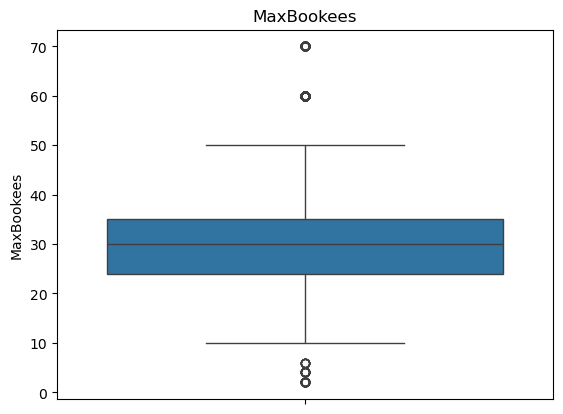

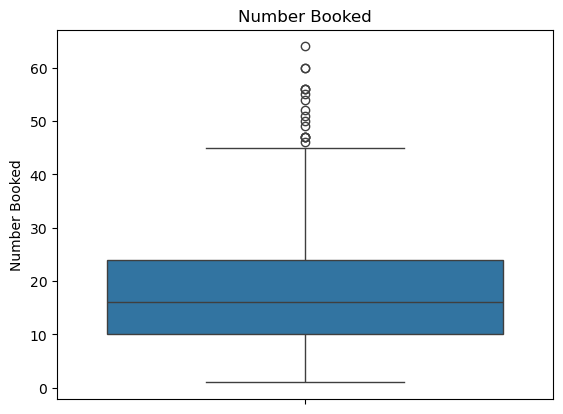

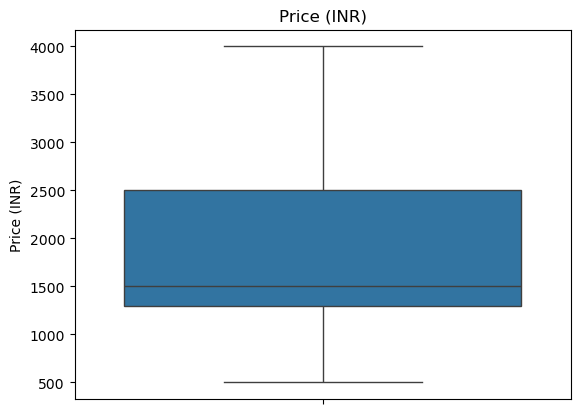

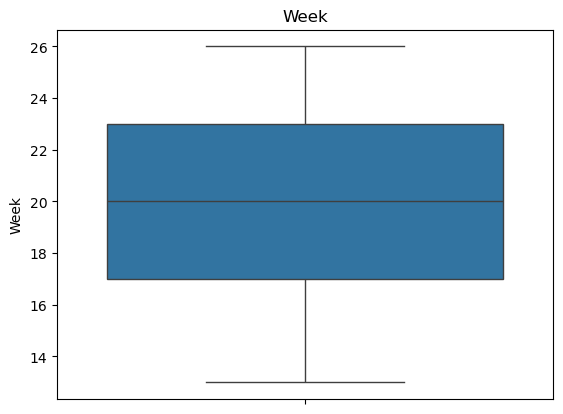

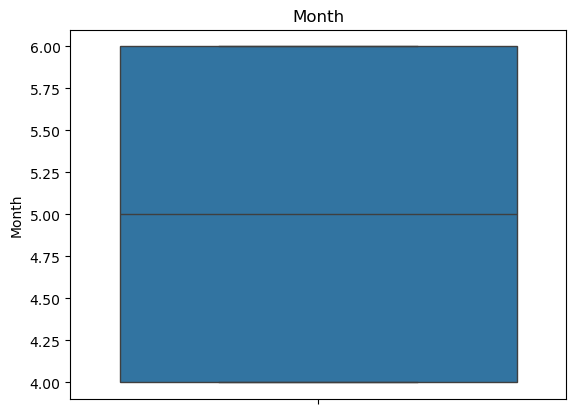

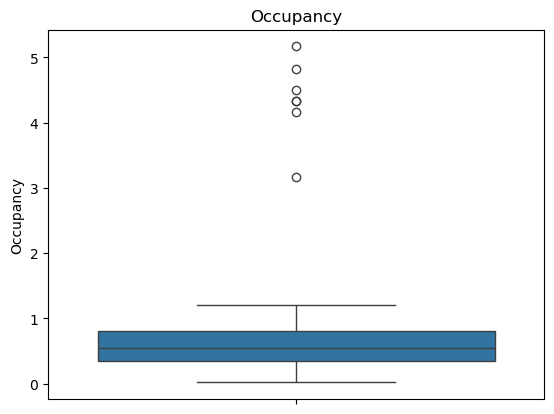

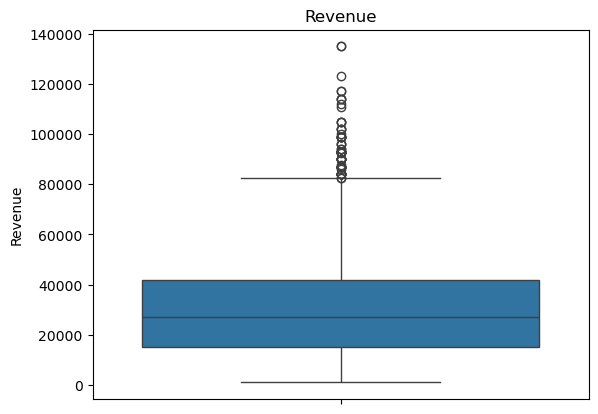

In [355]:
for x in num_col:
    plt.title(x)
    sns.boxplot(df[x])
    plt.show()

Observation:

    MaxBookees - Maajority numer bookings slots are around 25 to 35 and median of total booking slots
    is 30. Outliers are found in the MaxBookees and need to deal with it before modelling.

    Number Booked - Total Bookings are within the range of 10 to 25 and the median is around 15

    Price - Price range is from 500 to 4000 and maximum bookings are between 1300 to 2500. Median price range is 2500.

    Occupancy - Mazority Occupancy rate is below 1, there are very few cases where occupancy rate is more than 3

    Revenue -  Median Revenue is around 30000. Outliers in revenue will be fix as we fix for number booked column

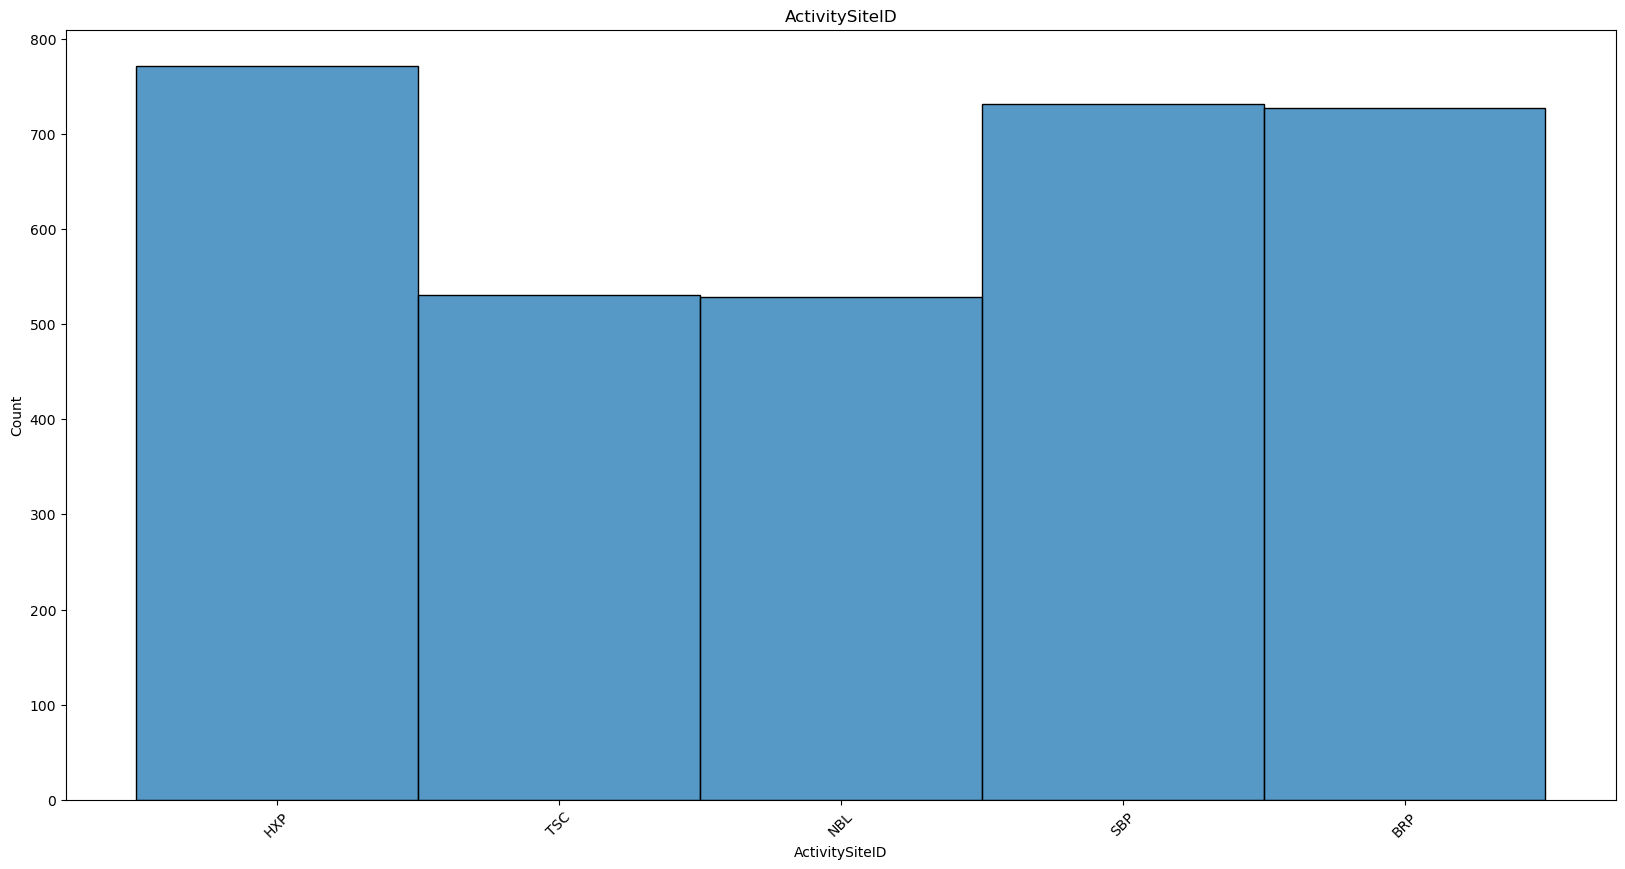

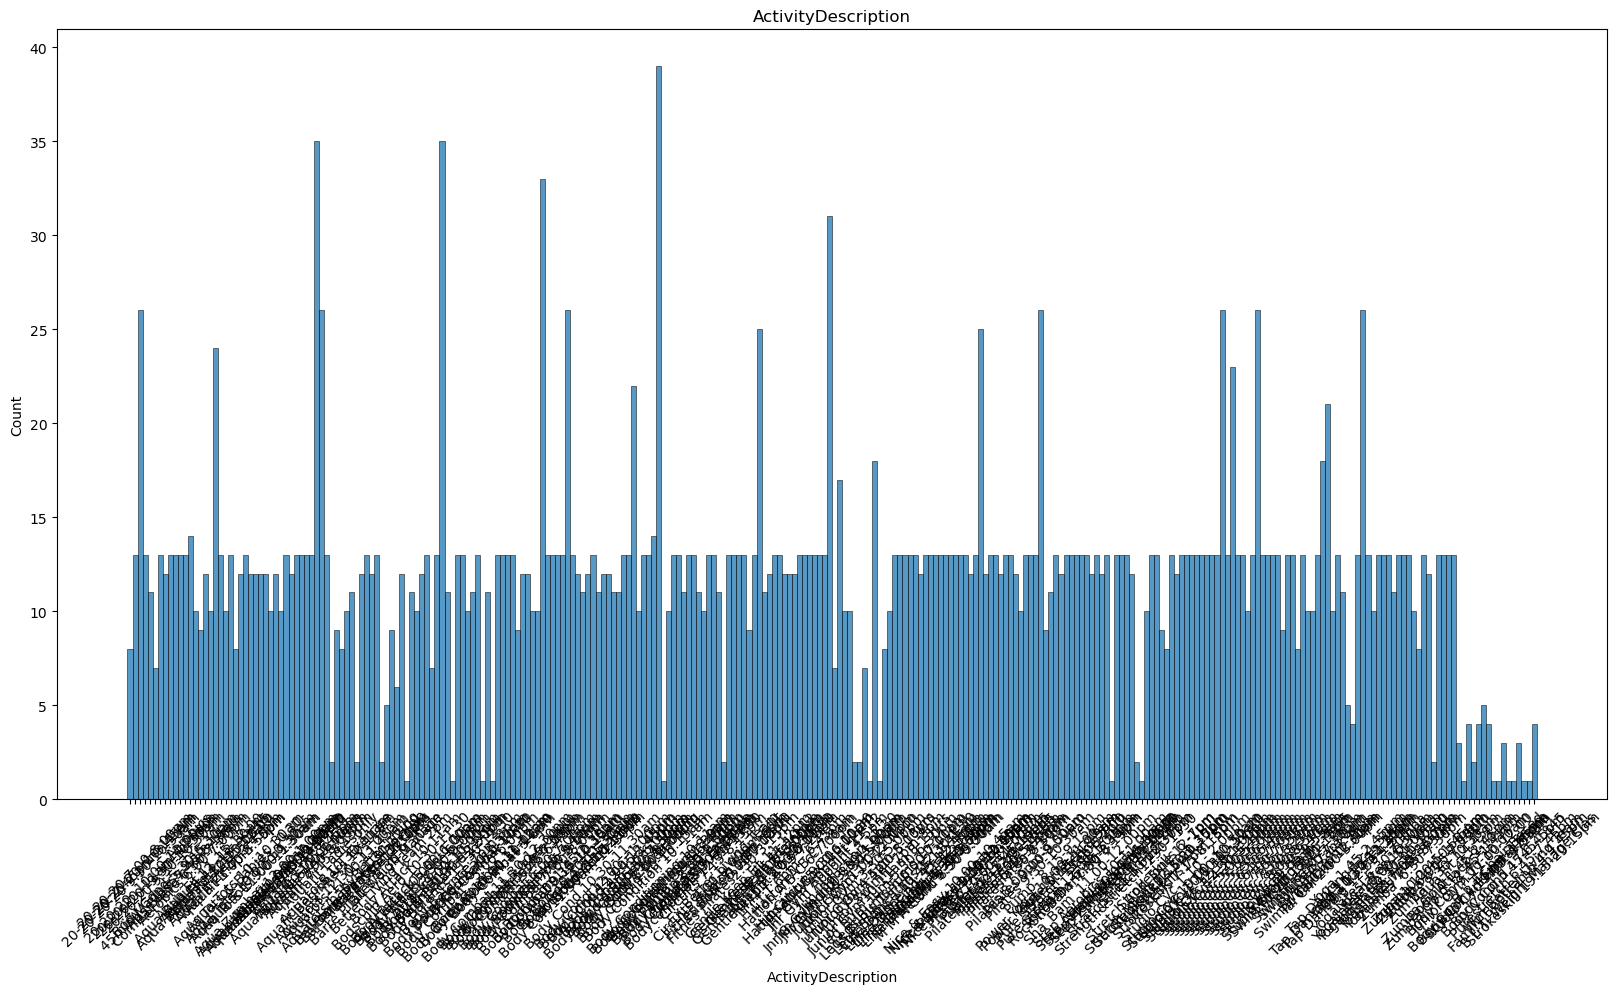

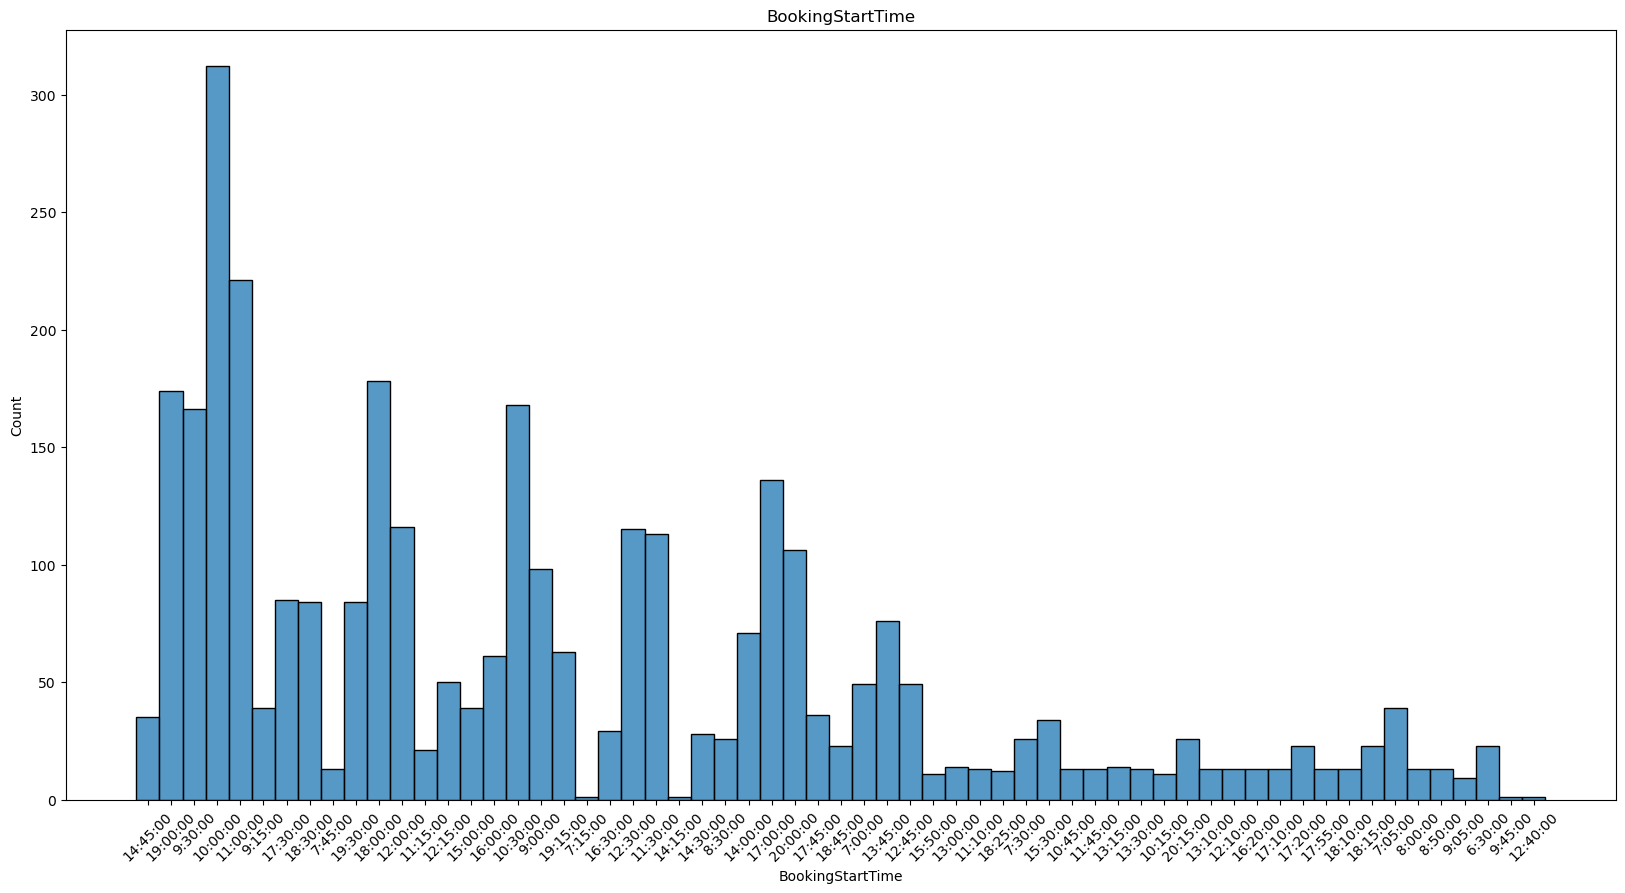

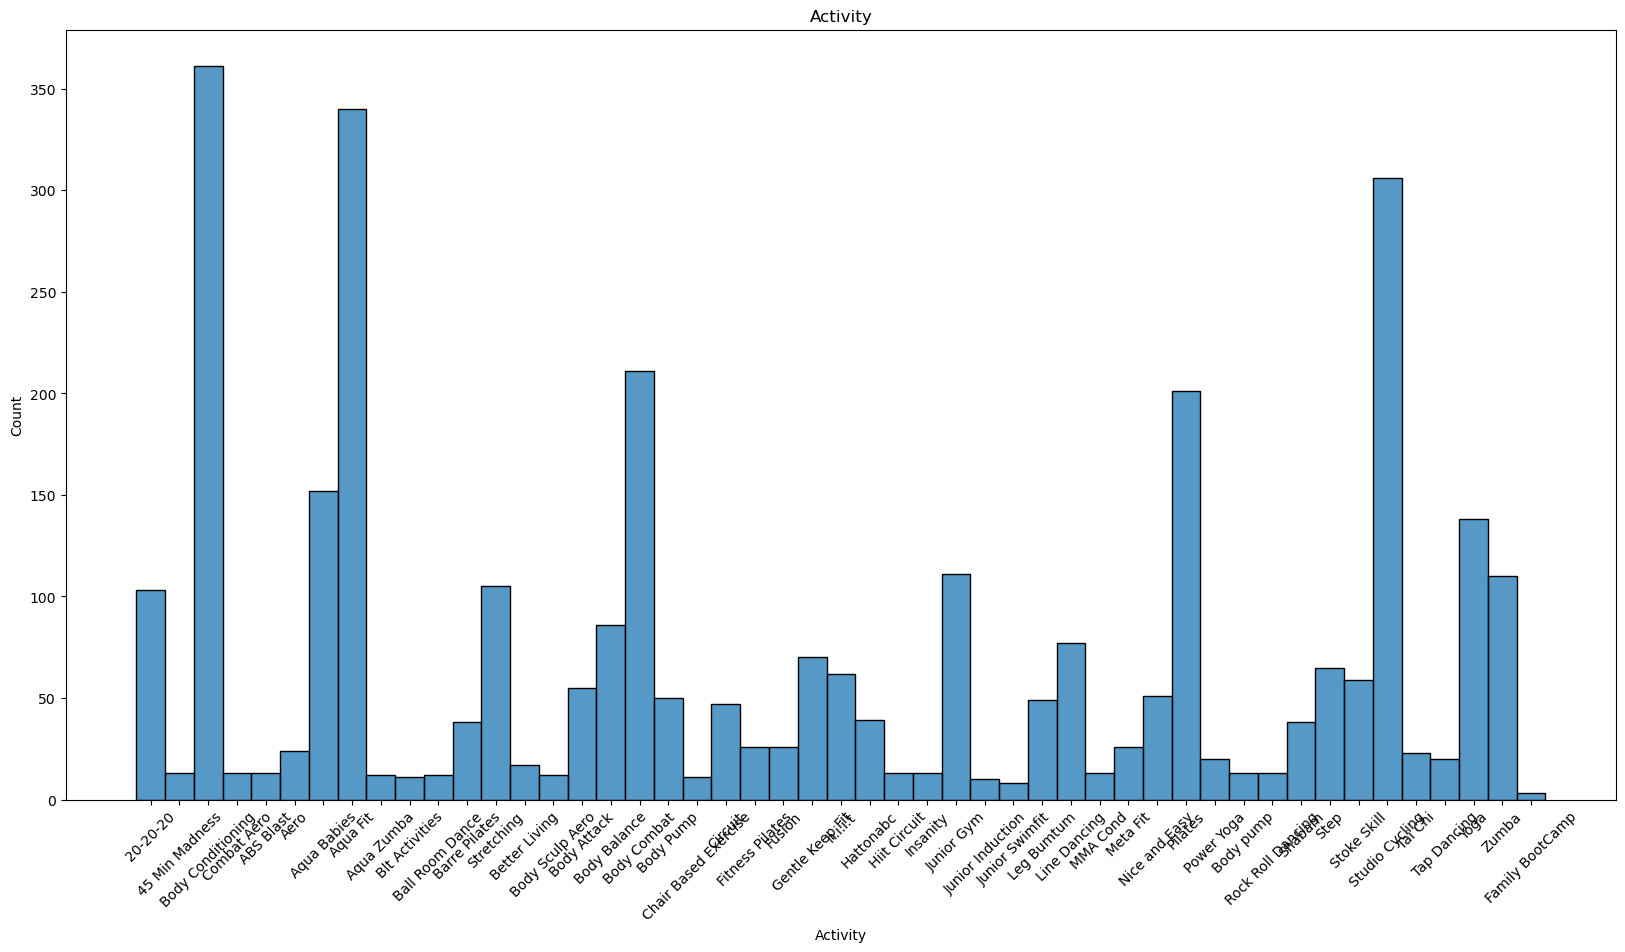

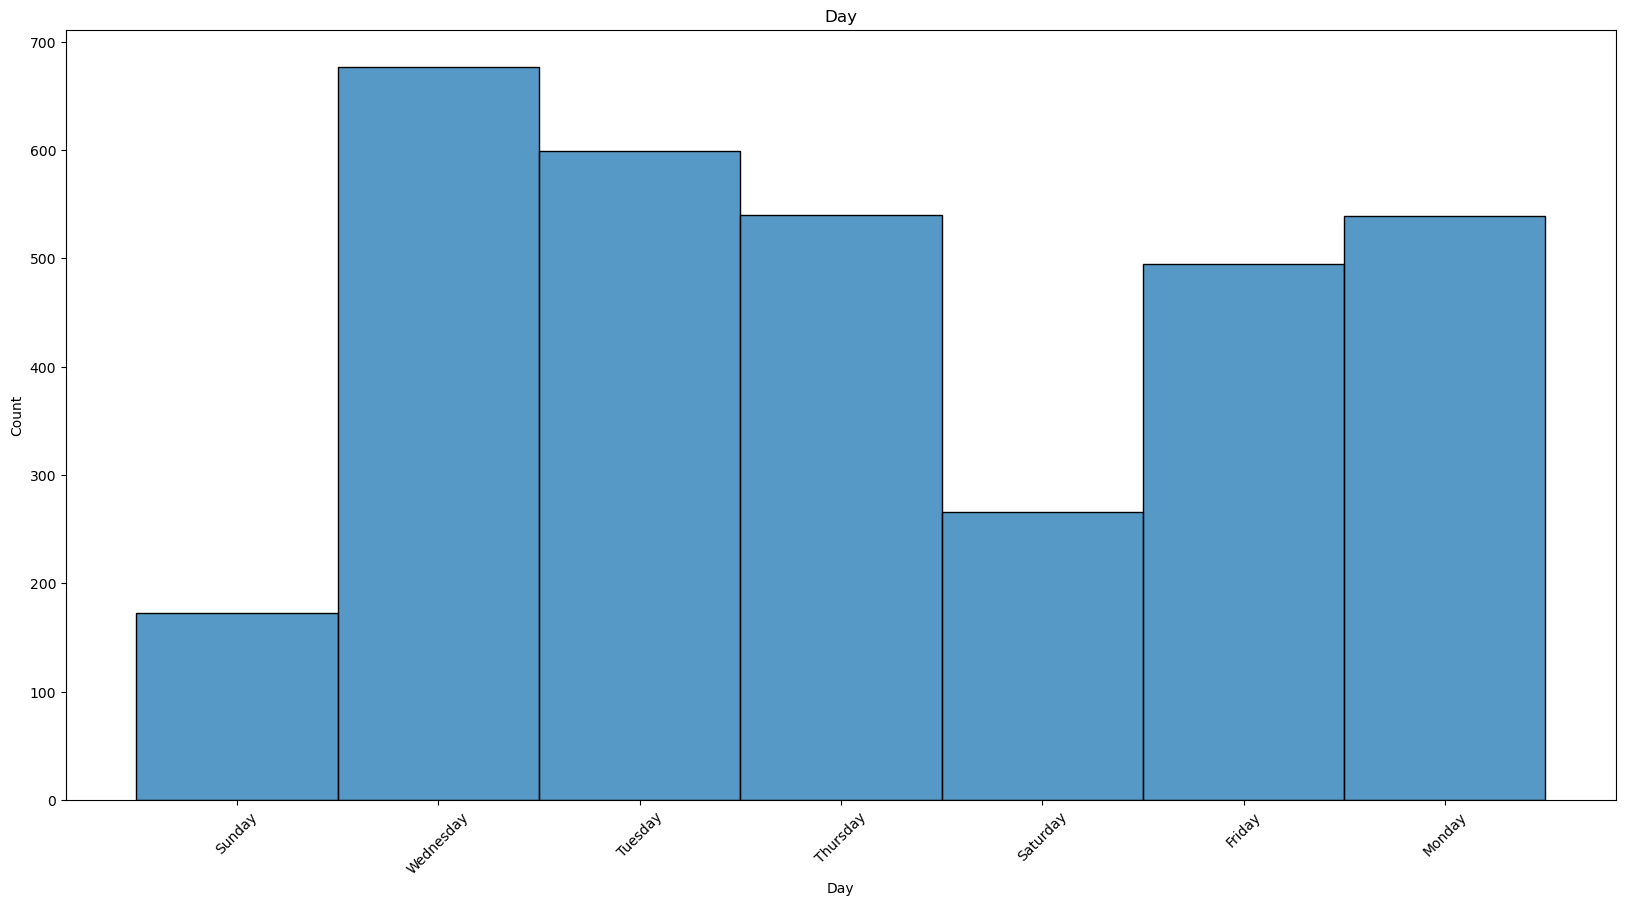

In [357]:
for x in cat_col:
    plt.figure(figsize=(20,10))
    plt.title(x)
    sns.histplot(df[x])
    plt.xticks(rotation = 45)
    plt.show()

In [358]:
df['ActivityDescription'].value_counts().sort_values(ascending=False)

ActivityDescription
Body Conditioning 10-11am    39
Aquafit 7.00-8.00pm          35
Body Balance 11-12pm         35
Body Combat 7.00-8.00pm      33
Jnr Gym Appoint 4-5pm        31
                             ..
Step Heidi (from Nb)10.30     1
Wm Better Living Team         1
B L T- Weight Manage Clas     1
B L T Chair Based             1
Stretch 11-12pm               1
Name: count, Length: 280, dtype: int64

Observation:

    ActivitySiteID - HXP is the Activity Site with Maximum number of Activities. Least one is NBL, TSC is Close enough to NBL'st Activities.

    ActivityDescription - Most Common Activity is Body Conditioning 10-11am.

    BookingStartTime - Maximum Number of activities registrated are at 10 am and least are at 2:15pm, 7:15am, 9:45am, 12:40pm.

    Day -  Majority Activites are Occured on Wednesday.

### Biviarte Analysis

<Axes: title={'center': 'Activity site by Occupancy'}, xlabel='ActivitySiteID', ylabel='Occupancy'>

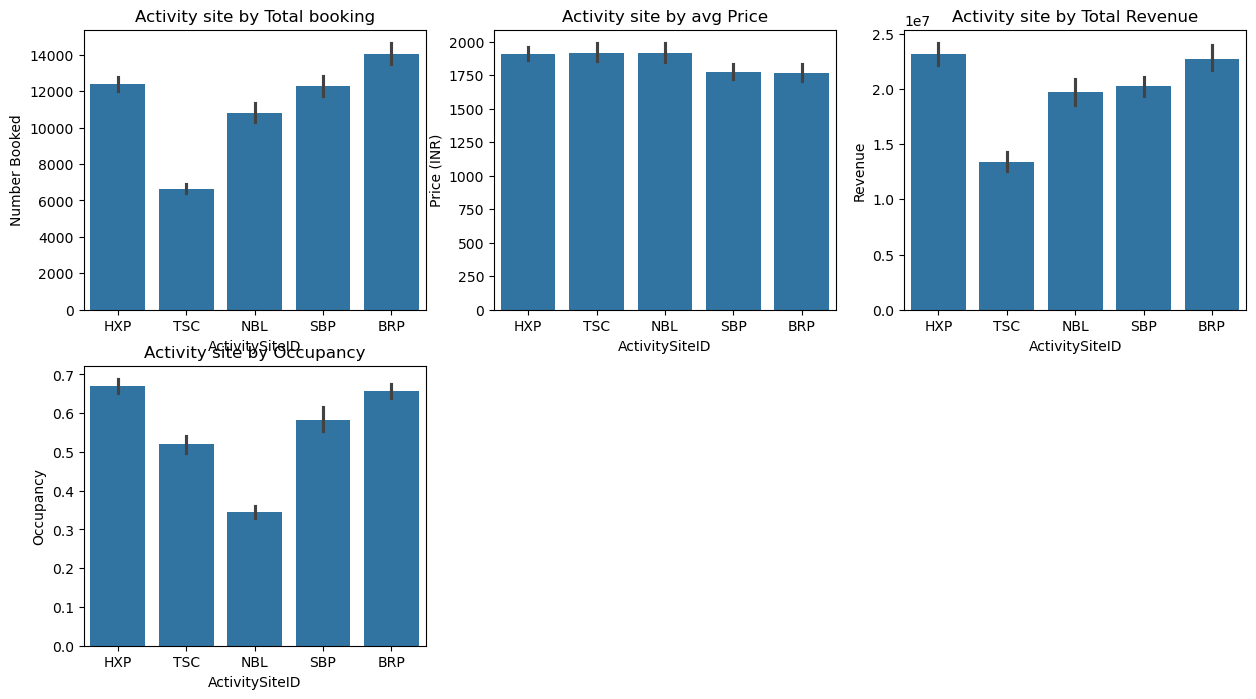

In [361]:
# Activity Site vs Booking and price
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.title('Activity site by Total booking')
sns.barplot(x=df['ActivitySiteID'],y=df['Number Booked'],estimator='sum')
plt.subplot(2,3,2)
plt.title('Activity site by avg Price')
sns.barplot(x=df['ActivitySiteID'],y=df['Price (INR)'],estimator='mean')
plt.subplot(2,3,3)
plt.title('Activity site by Total Revenue')
sns.barplot(x=df['ActivitySiteID'],y=df['Revenue'], estimator='sum')
plt.subplot(2,3,4)
plt.title('Activity site by Occupancy')
sns.barplot(x=df['ActivitySiteID'],y=df['Occupancy'], estimator='mean')

Observatuon:

    Most Booked location is BRP, followed bt NBL and least is TSC.

    Activity choosen in NBL TSC and HXP avg costs between 1750 and 2000.

    According to revenue chart HXP has the higesht revenue and TSC with lowest.

    BRP revenue is around 30000000 less than HXP even though the bookings is max of all, this is becasue Activity held in BRP, mean costs is less than 1800.

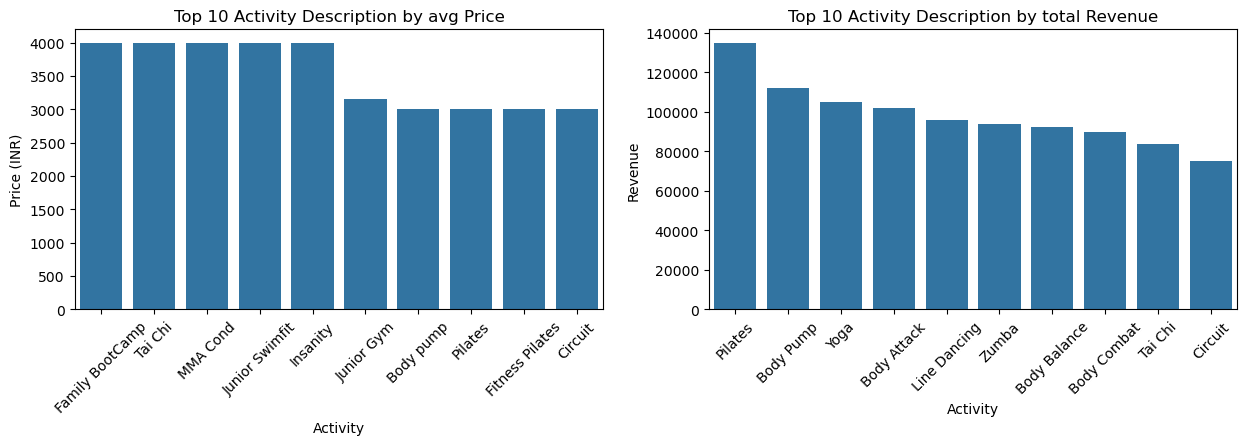

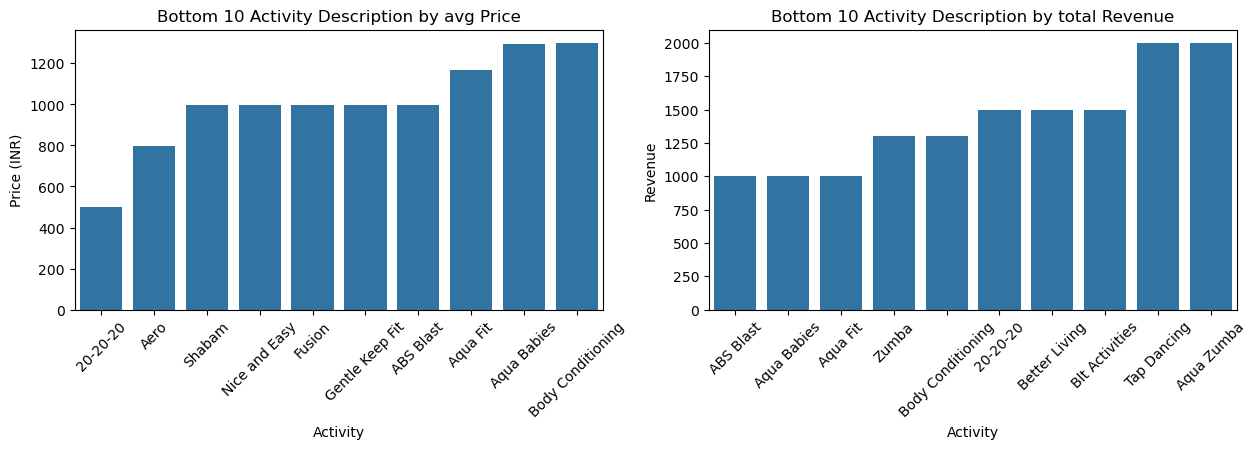

In [363]:
top_10_activity_price = df.groupby('Activity')['Price (INR)'].mean().sort_values(ascending=False).head(10)
top_10_activity_revenue = df.groupby('Activity')['Revenue'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('Top 10 Activity Description by avg Price')
sns.barplot(data=top_10_activity_price)
plt.xticks(rotation=45)
plt.subplot(2,2,2)
plt.title('Top 10 Activity Description by total Revenue')
sns.barplot(data=top_10_activity_revenue)
plt.xticks(rotation=45)
bottom_10_activity_price = df.groupby('Activity')['Price (INR)'].mean().sort_values(ascending=True).head(10)
bottom_10_activity_revenue = df.groupby('Activity')['Revenue'].min().sort_values(ascending=True).head(10)
plt.figure(figsize=(15,8))
plt.subplot(2,2,3)
plt.title('Bottom 10 Activity Description by avg Price')
sns.barplot(data=bottom_10_activity_price)
plt.xticks(rotation=45)
plt.subplot(2,2,4)
plt.title('Bottom 10 Activity Description by total Revenue')
sns.barplot(data=bottom_10_activity_revenue)
plt.xticks(rotation=45)
plt.show()

Observations:

            'M M A Cond', 'Junior Swimfit','Family Bootcamp', 'Insanity','Tai Chi', 'Tai-Chi ' are the Activity with highest pricing
            'Pilates' is the activity generating maximum revenue and 'AquaBabies', 'Aquafit', 'ABS Blast' are the least Revenue generating Activities
            20-20-20 are the least priced activity all over the sites

<Axes: title={'center': 'Number Booked by median Price'}, xlabel='Number Booked', ylabel='Price (INR)'>

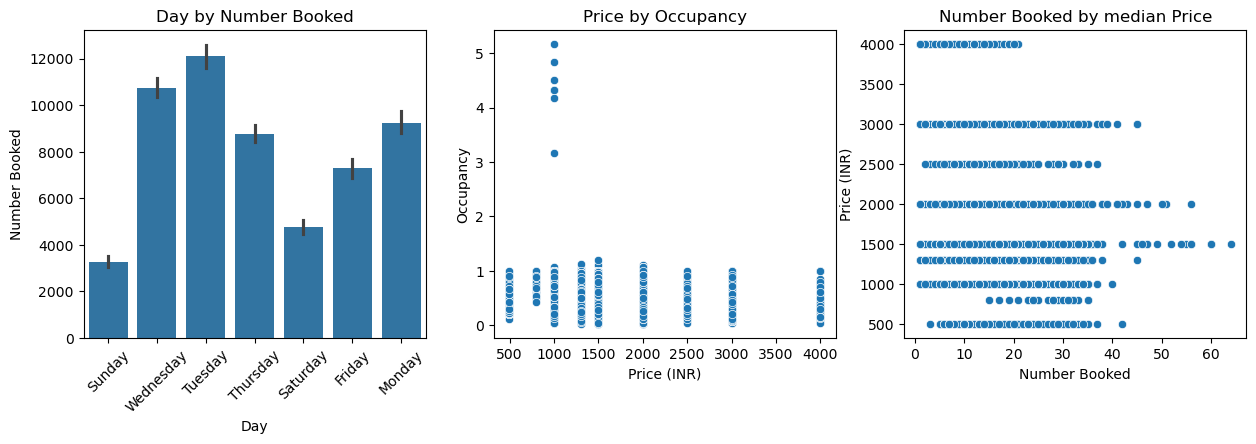

In [365]:
# Number Booking vs Time and occuppancy
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title('Day by Number Booked')
sns.barplot(x=df['Day'],y=df['Number Booked'],estimator='sum')
plt.xticks(rotation = 45)
plt.subplot(1,3,2)
plt.title('Price by Occupancy')
sns.scatterplot(x=df['Price (INR)'],y=df['Occupancy'])
plt.subplot(1,3,3)
plt.title('Number Booked by median Price')
sns.scatterplot(x=df['Number Booked'],y=df['Price (INR)'])

Observation:

    Maximum bookings are happening on tuesday and Wednesday, least on Sunday

    Best Occupany is found at 1500, at 1000 Occupany shows the most cause maxbookees were very less

    Maximum Bookings occurs at the price of 1500 followed by 2000, and eventually decreases when price rises.

In [367]:
top_20_activity_booked = df.groupby('Activity')['Number Booked'].mean().sort_values(ascending=False).head(20)
top_20_activity_occupied = df.groupby('Activity')['Occupancy'].mean().sort_values(ascending=False).head(20)

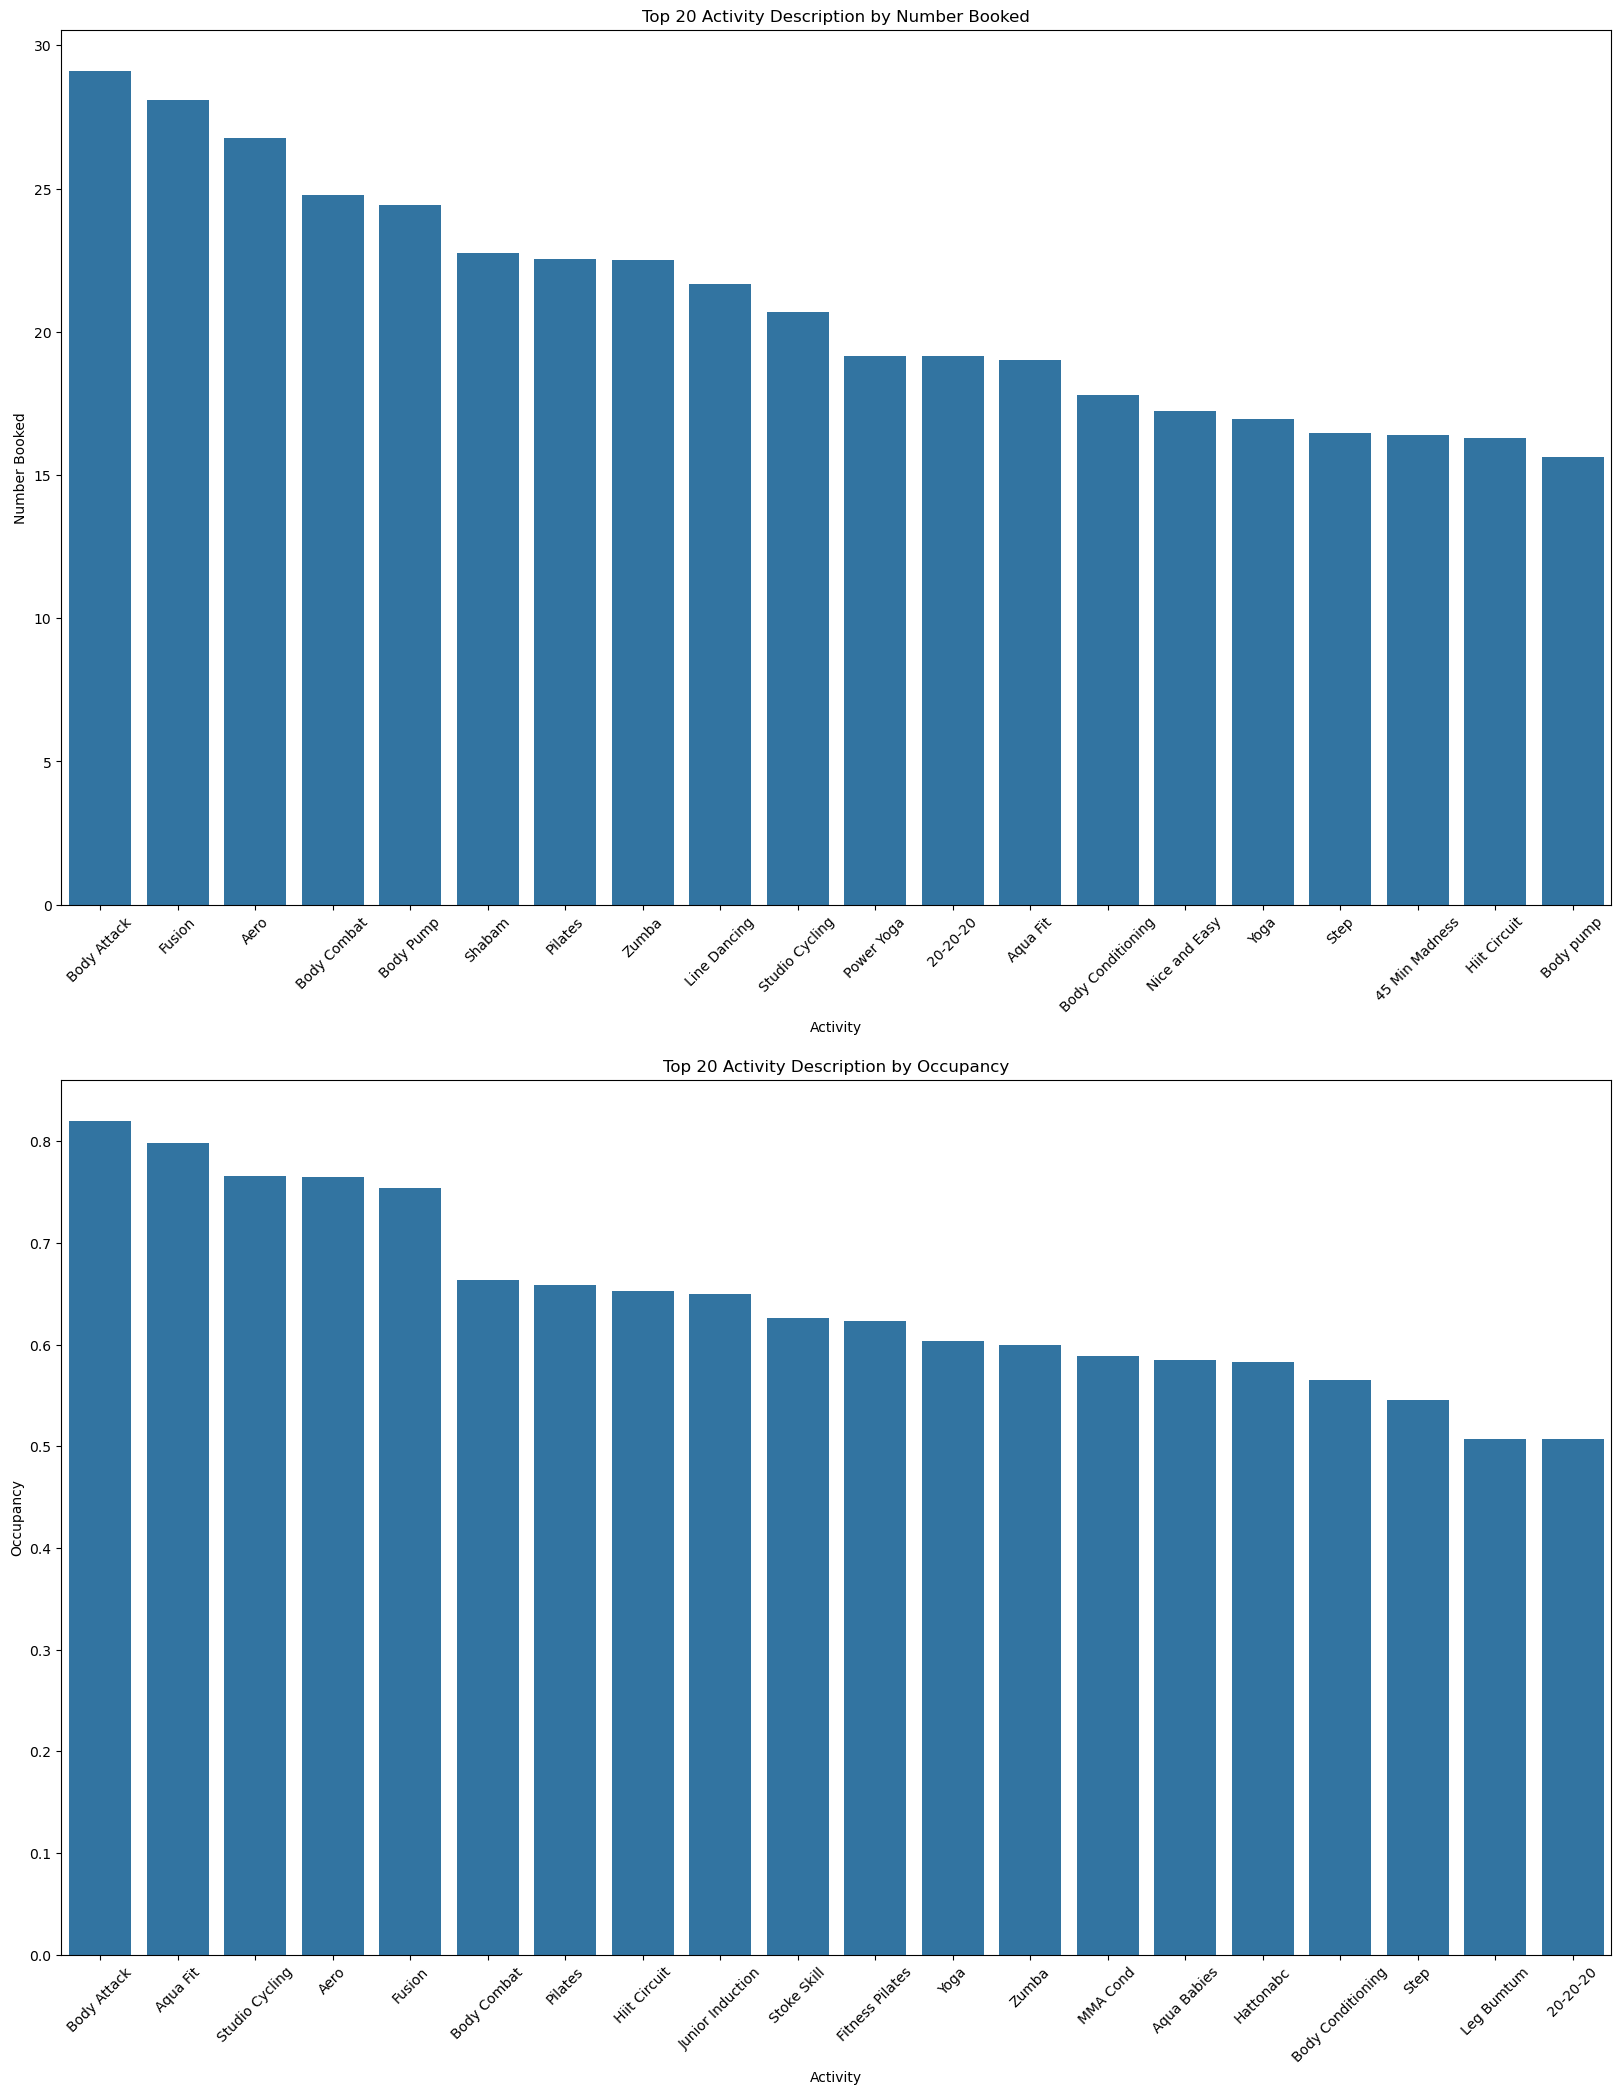

In [368]:
plt.figure(figsize=(20,25))
plt.subplot(2,1,1)
plt.title('Top 20 Activity Description by Number Booked')
sns.barplot(data= top_20_activity_booked,estimator='mean')
plt.xticks(rotation = 45)
plt.subplot(2,1,2)
plt.title('Top 20 Activity Description by Occupancy')
sns.barplot(data= top_20_activity_occupied,estimator='mean')
plt.xticks(rotation = 45)
plt.show()

Observation:

    Body Attack has most average bookings, following Fusion.
    Body Attack is the top Occupied Activities

In [370]:
bottom_20_activity_booked = df.groupby('Activity')['Number Booked'].mean().sort_values(ascending=True).head(20)
bottom_20_activity_occupied = df.groupby('Activity')['Occupancy'].mean().sort_values(ascending=True).head(20)

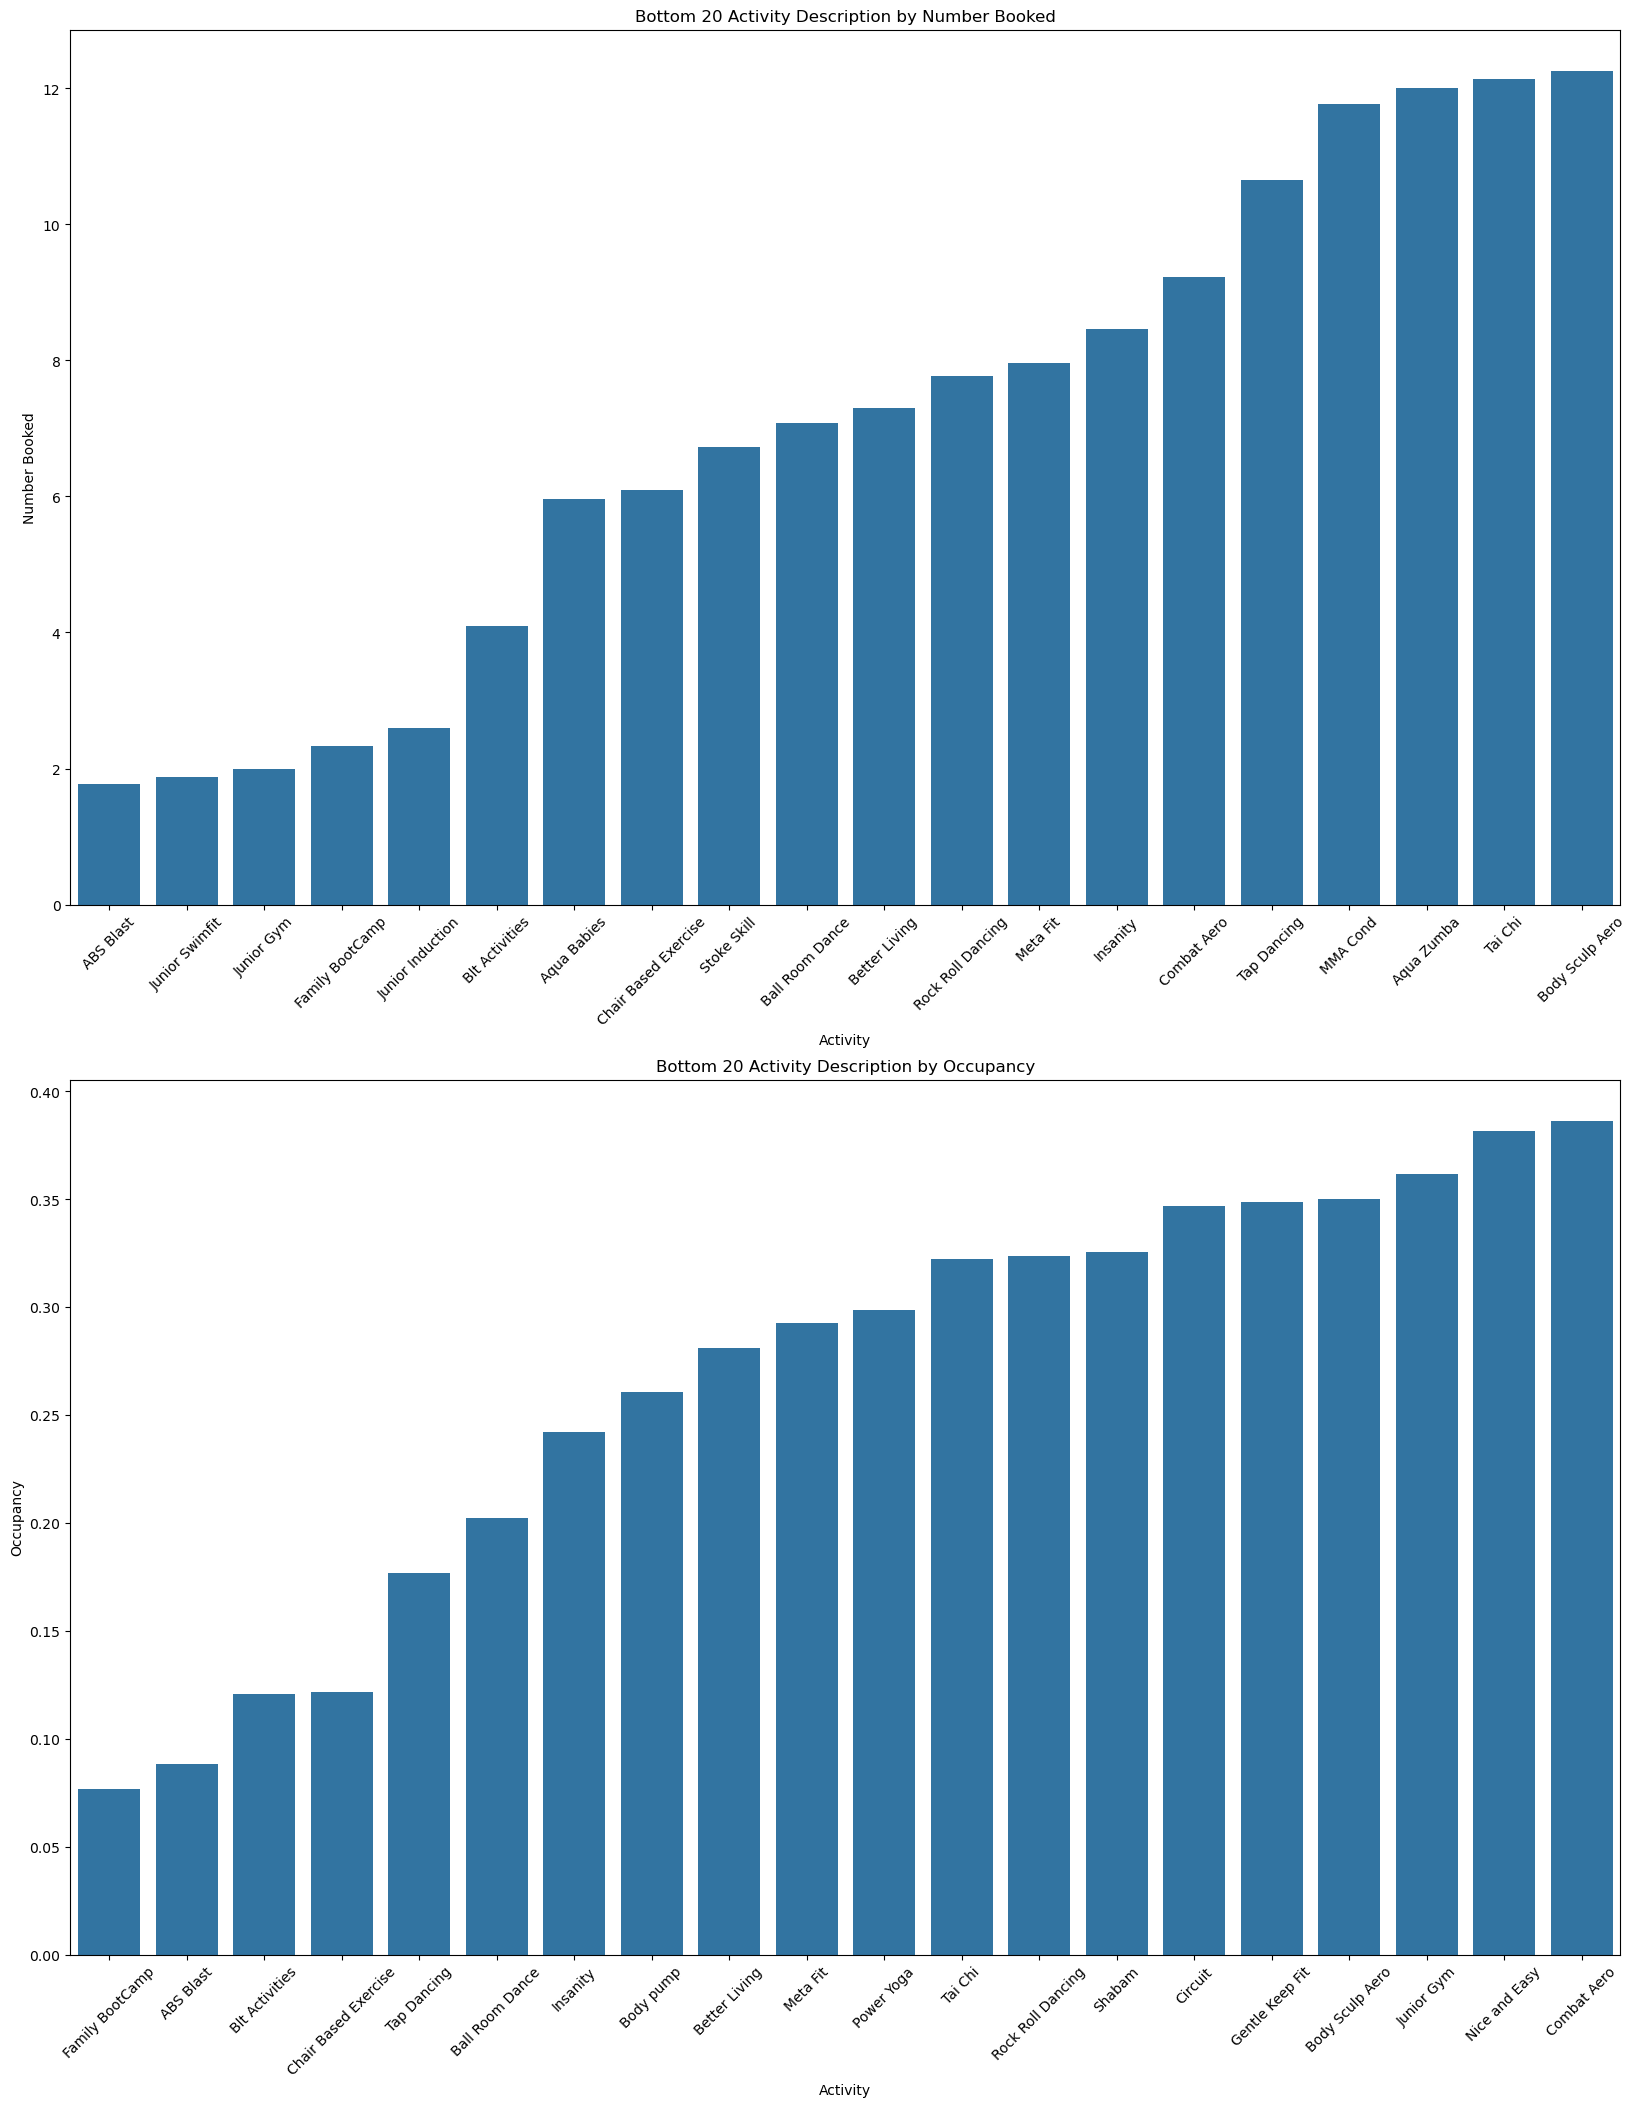

In [371]:
plt.figure(figsize=(20,25))
plt.subplot(2,1,1)
plt.title('Bottom 20 Activity Description by Number Booked')
sns.barplot(data= bottom_20_activity_booked,estimator='mean')
plt.xticks(rotation = 45)
plt.subplot(2,1,2)
plt.title('Bottom 20 Activity Description by Occupancy')
sns.barplot(data= bottom_20_activity_occupied,estimator='mean')
plt.xticks(rotation = 45)
plt.show()

Observation:

    'ABS Blast' has least average bookings followed by 'Junior Swimfit'.
    Family Bootcamps are least Occupied Activities

<Axes: title={'center': 'Number Booked by Week'}, xlabel='Week', ylabel='Number Booked'>

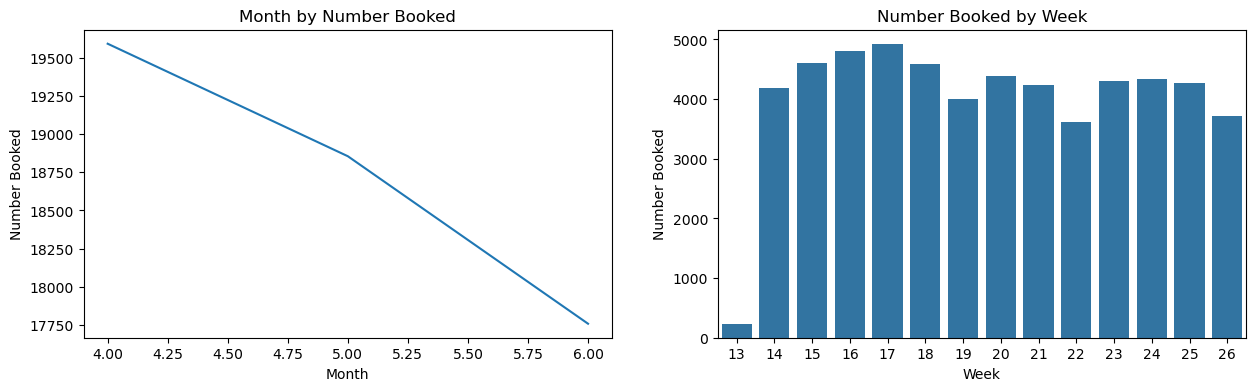

In [373]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Month by Number Booked')
sns.lineplot(data=df.groupby('Month')['Number Booked'].sum())
plt.subplot(1,2,2)
plt.title('Number Booked by Week')
sns.barplot(data=df.groupby('Week')['Number Booked'].sum())

In [374]:
import datetime

year = 2018
week = 17
d = datetime.datetime.strptime(f'{year}-{week}-1', "%Y-%W-%w")
print(d.strftime("Week %W of %Y starts on %B %d, %Y"))


Week 17 of 2018 starts on April 23, 2018


Observation:

    April Month had msot booking and its decreasing over time
    
    Maximum Bookings are Occured on 17 week of the year that is 23rd to 29th of April

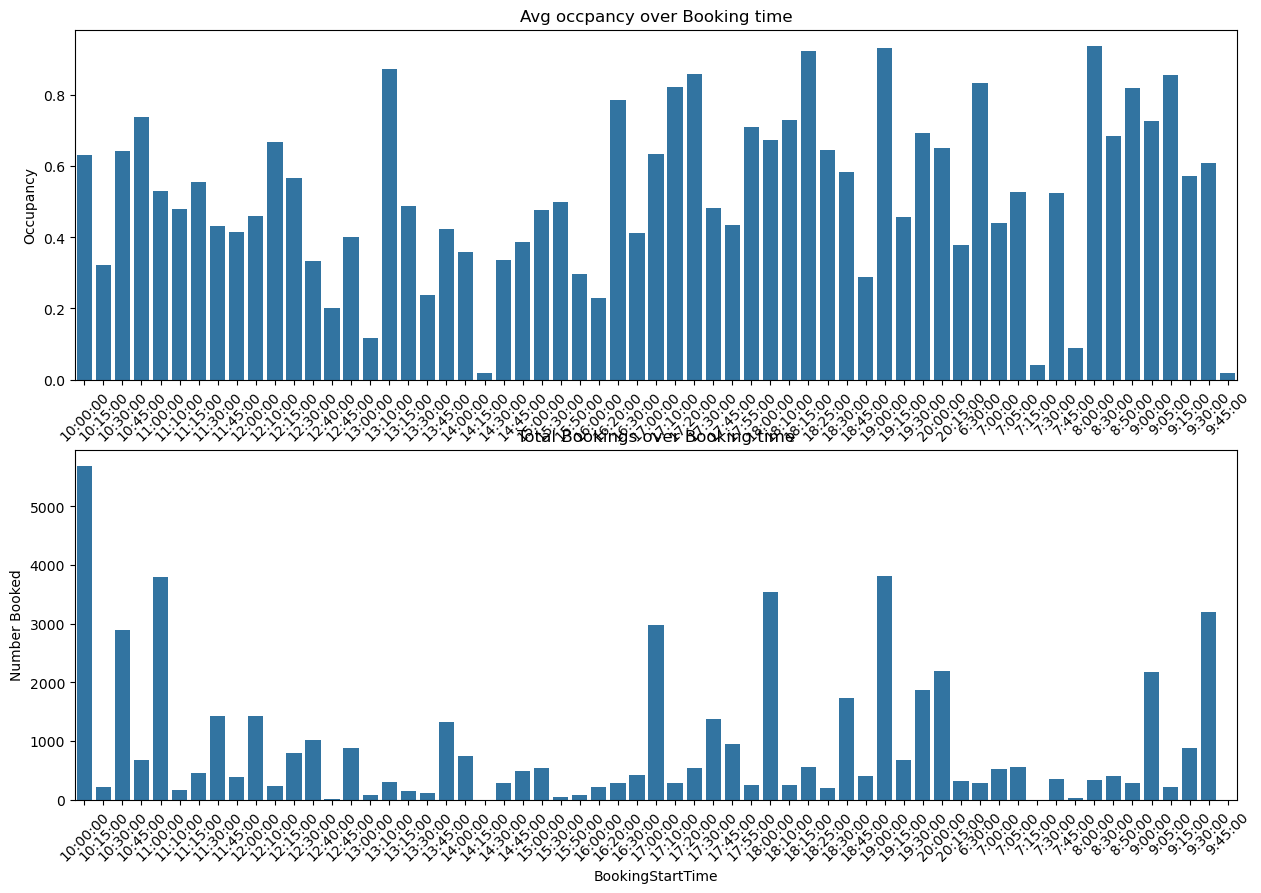

In [376]:
# Booking time vs Occupancy and Bookings
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.title('Avg occpancy over Booking time')
sns.barplot(data=df.groupby('BookingStartTime')['Occupancy'].mean())
plt.xticks(rotation=45)
plt.subplot(2,1,2)
plt.title('Total Bookings over Booking time')
sns.barplot(data=df.groupby('BookingStartTime')['Number Booked'].sum())
plt.xticks(rotation=45)
plt.show()

Observation:

            Maximum Average Occupancy is at 8 am followed by 7pm,6.15pm,1,10pm...
            Total Bookgs are held for 10 am Activities

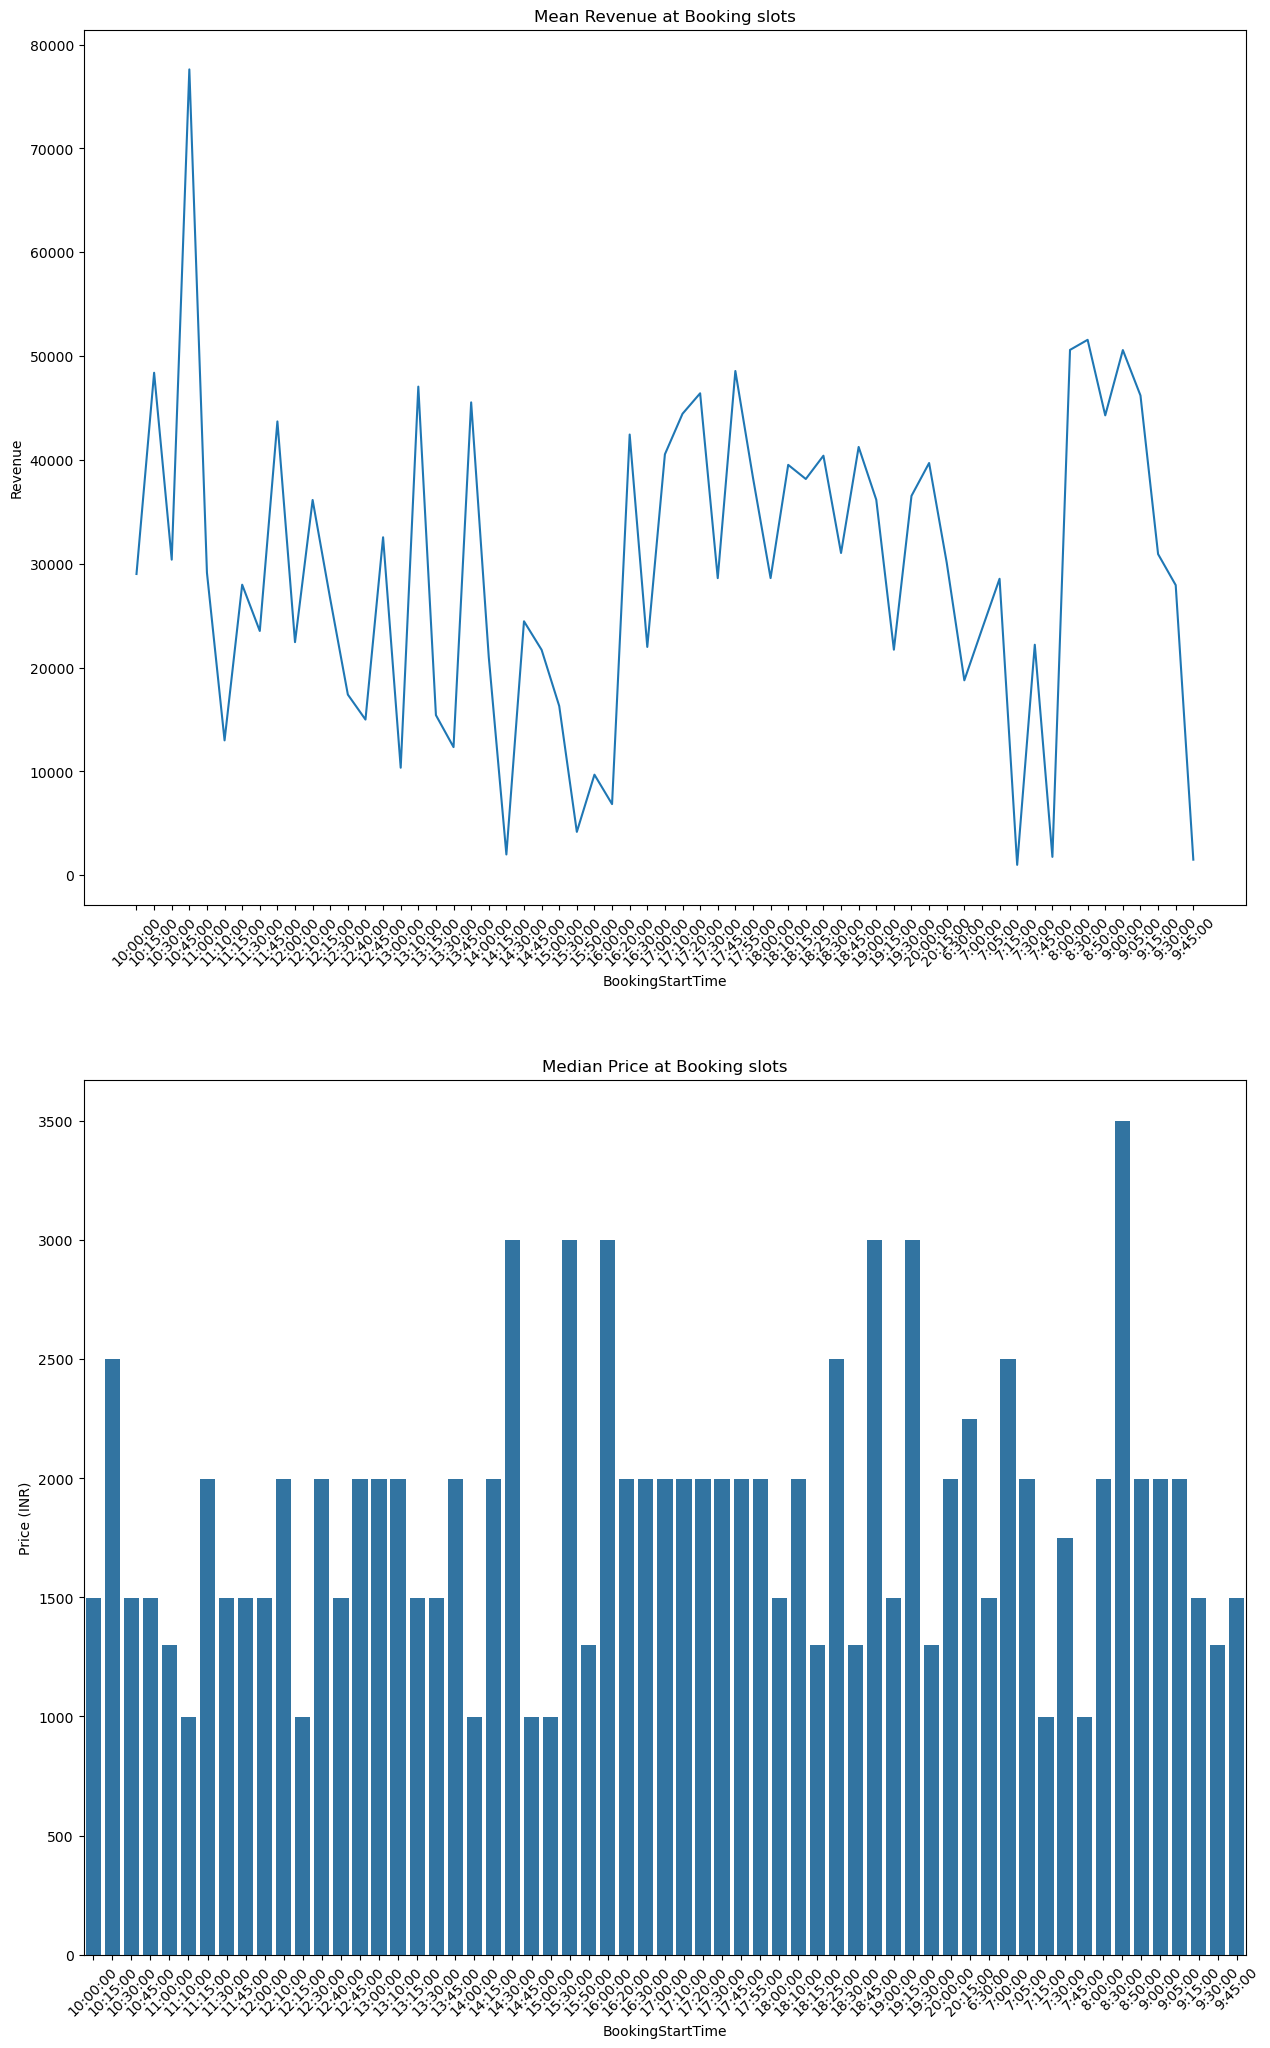

In [378]:
# Booking Time vs Revenue
plt.figure(figsize=(15,25))
plt.subplot(2,1,1)
plt.title('Mean Revenue at Booking slots')
sns.lineplot(data=df.groupby('BookingStartTime')['Revenue'].mean())
plt.xticks(rotation=45)
plt.subplot(2,1,2)
plt.title('Median Price at Booking slots')
sns.barplot(data=df.groupby('BookingStartTime')['Price (INR)'].median())
plt.xticks(rotation=45)
plt.show()

Observation:

            Most Revenue genrating evets are cunducted at 10.45 and least are form morning 7.15,7.46,9.45am and 2.15pm.
            High Pricing Activity are conducted on 8.30am and least pricing avtivity are in early morning and at afternoon
            

### Multivirate Analysis

In [381]:
corr = df[df.describe().columns].corr()
corr

,BookingEndDateTime (Month / Day / Year),MaxBookees,Number Booked,Price (INR),Week,Month,Occupancy,Revenue
BookingEndDateTime (Month / Day / Year),1.000000,0.008174,-0.098940,-0.006336,0.997824,0.944845,-0.100170,-0.089531
MaxBookees,0.008174,1.000000,0.443628,-0.093681,0.012187,0.002089,-0.271570,0.341213
Number Booked,-0.098940,0.443628,1.000000,-0.188412,-0.095500,-0.096086,0.570692,0.736063
Price (INR),-0.006336,-0.093681,-0.188412,1.000000,-0.009227,-0.005676,-0.101511,0.419921
Week,0.997824,0.012187,-0.095500,-0.009227,1.000000,0.942591,-0.102908,-0.087633
Month,0.944845,0.002089,-0.096086,-0.005676,0.942591,1.000000,-0.096546,-0.088526
Occupancy,-0.100170,-0.271570,0.570692,-0.101511,-0.102908,-0.096546,1.000000,0.414083
Revenue,-0.089531,0.341213,0.736063,0.419921,-0.087633,-0.088526,0.414083,1.000000


<Axes: >

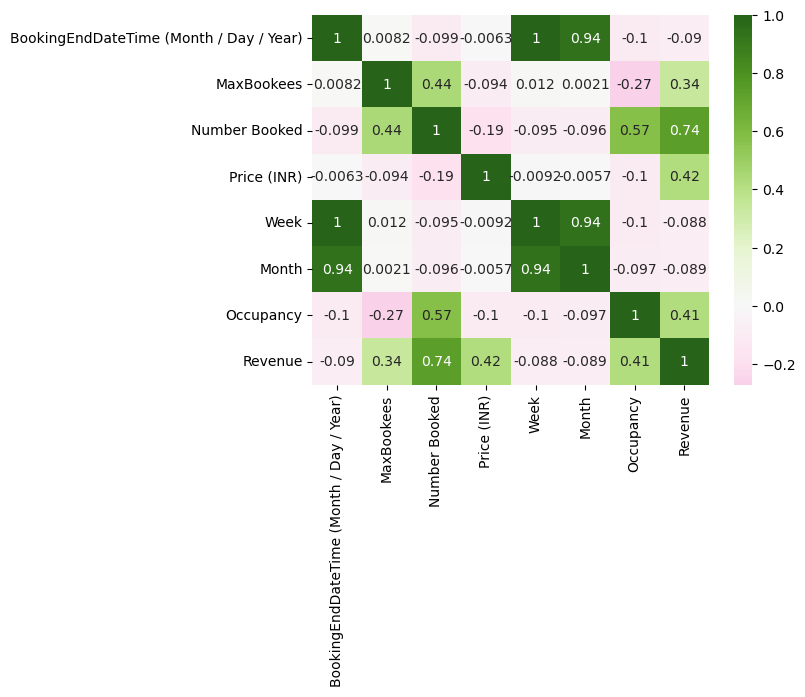

In [382]:
sns.heatmap(data=corr,cmap='PiYG',annot=True,center=0)

Observations:

    Number Booked has most corelation with Revenue, followed by Occupancy

    Occupancy has slight negative corelation with MaxBookees and good Corelation with Number Booked.

    Revenue has atleast slight corelation with all other features except Booking date.

## Dealing with Outliers

We will remove outliers from number booked by deleting the records.

In [386]:
df['Number Booked'].describe(percentiles=[0.05,0.25,0.5,0.75,0.95])

count    3289.000000
mean       17.088781
std         9.504098
min         1.000000
5%          3.000000
25%        10.000000
50%        16.000000
75%        24.000000
95%        33.000000
max        64.000000
Name: Number Booked, dtype: float64

In [387]:
df = df[df['Number Booked'] <= 33] # Removing records that are outliers in Number Booked

We will Cap Max Bookes into Inter Quartile Range Limits

In [389]:
df['MaxBookees'].describe(percentiles=[0.05,0.25,0.5,0.75,0.95])

count    3138.000000
mean       31.361695
std        14.644295
min         2.000000
5%         10.000000
25%        24.000000
50%        27.000000
75%        35.000000
95%        60.000000
max        70.000000
Name: MaxBookees, dtype: float64

In [390]:
iqr = 35-24 # IQR = 75th percentile - 25thpercentile
l_l = 24-(1.5*iqr) # lower limit = 25th percentile - 1.5*IQR
u_l = 35+(1.5*iqr) # Upper limit = 75th percentile - 1.5*IQR

In [391]:
df['MaxBookees'] = df['MaxBookees'].apply(lambda x: round(u_l) if x > u_l else x)
df['MaxBookees'] = df['MaxBookees'].apply(lambda x: round(l_l) if x < l_l else x)

We will remove Records of Occupancy having more that 95th percentiles

In [393]:
df['Occupancy'].describe(percentiles=[0.05,0.25,0.5,0.75,0.95])

count    3138.000000
mean        0.559535
std         0.318814
min         0.020000
5%          0.140000
25%         0.330000
50%         0.525000
75%         0.780000
95%         1.000000
max         5.170000
Name: Occupancy, dtype: float64

In [394]:
df = df[df['Occupancy'] <= 1.5] # Removing records that are outliers in Occupancy

We will Revenue Bookes into Inter Quartile Range Limits

In [396]:
df['Revenue'].describe(percentiles=[0.05,0.25,0.5,0.75,0.95])

count     3131.000000
mean     28756.664644
std      18795.216162
min        999.000000
5%        3999.000000
25%      14289.000000
50%      25483.000000
75%      39984.000000
95%      65978.000000
max      98967.000000
Name: Revenue, dtype: float64

In [397]:
iqr = 39984-14289 # IQR = 75th percentile - 25thpercentile
l_l = 14289-(1.5*iqr) # lower limit = 25th percentile - 1.5*IQR
u_l = 39984+(1.5*iqr) # Upper limit = 75th percentile - 1.5*IQR

In [398]:
df['Revenue'] = df['Revenue'].apply(lambda x: round(u_l) if x > u_l else x)
df['Revenue'] = df['Revenue'].apply(lambda x: round(l_l) if x < l_l else x)

In [399]:
# Creating a Excel file
df.to_excel('D:/UpGrad/Cult Fit Project/Solution/Outlier_cleaned_classes.xlsx', index=False)
print("Successful")

Successful
